In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
import datetime
import seaborn as sns

In [3]:
def rtrn_risk_cal(stocks=['FB', 'MSFT', 'AAPL', 'IBM', 'GOOGL', 'TSLA', 'AMZN', 'JPC'], start= datetime.datetime(2000,1,1) , end= datetime.datetime(2022,1,1), ret= False):
    
    data = pd.DataFrame()
    for stock in stocks:
         data[stock] = pdr.DataReader(stock,data_source='yahoo', start= start, end= end)['Adj Close']

    rtrn_data = data/data.shift(1)
    rtrn_data =  np.log(rtrn_data[1:])
    cov_matrix = rtrn_data.cov()

    n_pf = 500
    weights_pf, std_pf, rtrn_pf = np.zeros(n_pf), np.zeros(n_pf), np.zeros(n_pf)
    rtrn_data_mean = rtrn_data.mean()
    weights_pf = []
    for j in range(n_pf):
        
        ## generate random portfolios~
        weight_pf = np.random.random(len(stocks))
        weight_pf = weight_pf/sum(weight_pf)
        weights_pf.append(weight_pf)
        
        ## evaluate return and std~
        rtrn_pf[j] = np.dot(rtrn_data_mean, weight_pf)*252
        std_pf[j] = np.sqrt( np.dot(weight_pf.T, np.dot(cov_matrix, weight_pf)) )
        if(std_pf[j] !=0) :
            srp_pf[j] = rtrn_pf[j]/std_pf[j]
        

    plt.scatter(std_pf, rtrn_pf,c= srp_pf,  marker= '*', s= 10, label= 'Data')
    plt.colorbar(label= "Shrape-ratio")
    plt.grid()
    plt.xlabel("risk")
    plt.ylabel("av. return")
    plt.scatter(std_pf[srp_pf.argmax()], rtrn_pf[srp_pf.argmax()], c= 'red',  marker= 'o', s= 20, label= 'MaxSharpe ratio')
    plt.legend()

    if ret==True : return weight_pf, rtrn_pf, std_pf
    



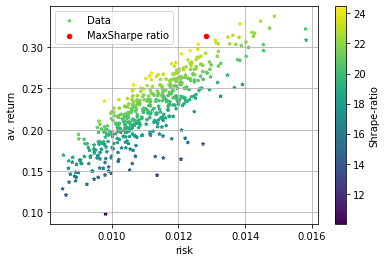

In [ ]:
rtrn_risk_cal(end= datetime.datetime(2016,1,1))

In [5]:
rtrn_risk_cal(end= datetime.datetime(2017,1,1))

NameError: name 'srp_pf' is not defined

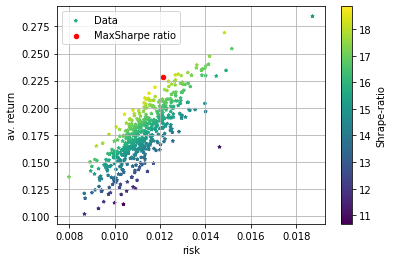

In [ ]:
rtrn_risk_cal(end= datetime.datetime(2019,1,1))

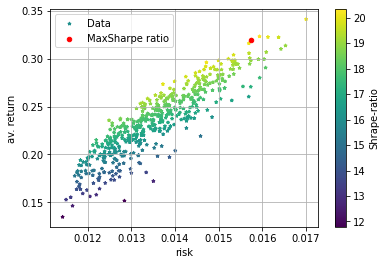

In [35]:
rtrn_risk_cal(end= datetime.datetime(2021,1,1))

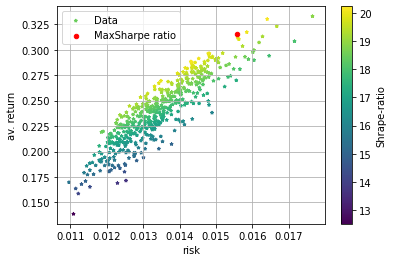

In [28]:
rtrn_risk_cal(end= datetime.datetime(2022,1,1))

In [27]:
## interested assets
stocks = ['FB', 'MSFT', 'AAPL', 'IBM', 'GOOGL', 'TSLA', 'AMZN', 'JPC']
# stocks = ['FB', 'GOOGL', 'TSLA','AAPL']
## get "Adjusted close" data for the stocks
start = datetime.datetime(2000,1,1)
end = datetime.datetime(2013,1,1)
data = pd.DataFrame()
for stock in stocks:
    data[stock] = pdr.DataReader(stock,data_source='yahoo', start= start, end= end)['High']
data    

,FB,MSFT,AAPL,IBM,GOOGL,TSLA,AMZN,JPC
Date,,,,,,,,
2012-05-18,45.000000,29.809999,19.407499,190.038239,316.526520,5.692,219.630005,8.77
2012-05-21,36.660000,29.790001,20.055000,189.225616,308.153168,5.852,219.979996,8.76
2012-05-22,33.590000,29.879999,20.495714,189.541107,307.212219,6.268,218.869995,8.81
2012-05-23,32.500000,29.400000,20.457144,187.848953,305.105103,6.210,217.550003,8.80
2012-05-24,33.209999,29.299999,20.589287,187.648178,306.266266,6.250,217.660004,8.92
...,...,...,...,...,...,...,...,...
2012-12-24,26.959999,27.250000,18.723213,185.305923,357.947937,6.870,259.500000,9.87
2012-12-26,27.180000,27.200001,18.552143,185.019119,356.796783,6.900,257.420013,9.89
2012-12-27,26.799999,27.090000,18.437500,184.780121,354.774780,6.782,249.350006,9.87


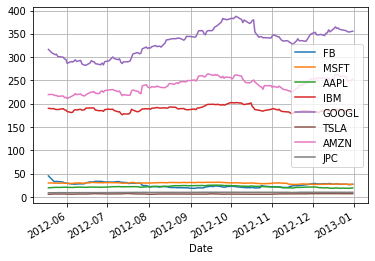

In [13]:
data.plot()
plt.grid()

In [14]:
rtrn_data = data/data.shift(1)
rtrn_data =  np.log(rtrn_data[1:])
rtrn_data 

,FB,MSFT,AAPL,IBM,GOOGL,TSLA,AMZN,JPC
Date,,,,,,,,
2012-05-21,-0.204976,-0.000671,0.032819,-0.004285,-0.026810,0.027722,0.001592,-0.001141
2012-05-22,-0.087458,0.003017,0.021737,0.001666,-0.003058,0.068674,-0.005059,0.005692
2012-05-23,-0.032988,-0.016195,-0.001884,-0.008968,-0.006882,-0.009296,-0.006049,-0.001136
2012-05-24,0.021611,-0.003407,0.006439,-0.001069,0.003799,0.006421,0.000506,0.013544
2012-05-25,-0.007860,0.002046,-0.018646,-0.001428,-0.016793,-0.027248,-0.007748,0.007817
...,...,...,...,...,...,...,...,...
2012-12-24,-0.001853,-0.008769,0.008775,-0.003451,-0.005077,0.005254,0.004325,0.007117
2012-12-26,0.008127,-0.001837,-0.009179,-0.001549,-0.003221,0.004357,-0.008048,0.002024
2012-12-27,-0.014080,-0.004052,-0.006199,-0.001293,-0.005683,-0.017249,-0.031851,-0.002024


<AxesSubplot:>

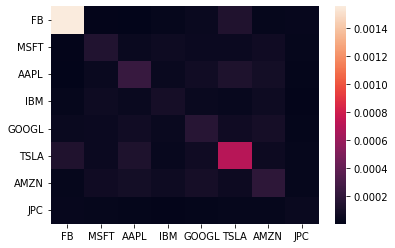

In [15]:
cov_matrix = rtrn_data.cov()
cov_matrix
sns.heatmap(cov_matrix)

In [16]:
## uniform weight portfoliio ~
weights = np.full(len(stocks), 1/(len(stocks)))
rtrn_pf = np.sum(rtrn_data.mean()*weights)
std_pf = np.sqrt( np.dot(weights.T, np.dot(cov_matrix, weights)) )
sr_pf = rtrn_pf/std_pf
sr_pf

-0.01076919466842504

In [17]:
## ensemble of random portfolios ~
n_pf = 500
rtrn_pf = np.zeros(n_pf)
std_pf = np.zeros(n_pf)
srp_pf = np.zeros(n_pf)
weights_pf = []
rtrn_data_mean = rtrn_data.mean()
for j in range(n_pf):
    
    ## generate random portfolios~
    weight_pf = np.random.random(len(stocks))
    weight_pf = weight_pf/sum(weight_pf)
    weights_pf.append(weight_pf)
    
    ## evaluate return and std~
    rtrn_pf[j] = np.dot(rtrn_data_mean, weight_pf)*252
    std_pf[j] = np.sqrt( np.dot(weight_pf.T, np.dot(cov_matrix, weight_pf)) )
    if(std_pf[j] !=0) :
         srp_pf[j] = rtrn_pf[j]/std_pf[j]

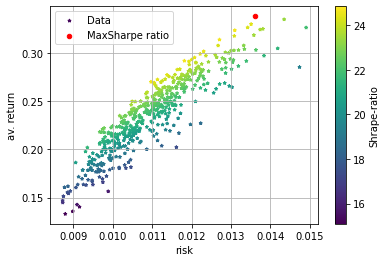

In [9]:
plt.scatter(std_pf, rtrn_pf,c= srp_pf,  marker= '*', s= 10, label= 'Data')
plt.colorbar(label= "Shrape-ratio")
plt.grid()
plt.xlabel("risk")
plt.ylabel("av. return")
plt.scatter(std_pf[srp_pf.argmax()], rtrn_pf[srp_pf.argmax()], c= 'red',  marker= 'o', s= 20, label= 'MaxSharpe ratio')
plt.legend()

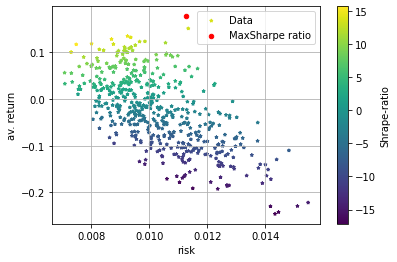

In [18]:
plt.scatter(std_pf, rtrn_pf,c= srp_pf,  marker= '*', s= 10, label= 'Data')
plt.colorbar(label= "Shrape-ratio")
plt.grid()
plt.xlabel("risk")
plt.ylabel("av. return")
plt.scatter(std_pf[srp_pf.argmax()], rtrn_pf[srp_pf.argmax()],c= 'red',  marker= 'o', s= 20, label= 'MaxSharpe ratio')
plt.legend()

In [10]:
srp_pf.argmax()

330

In [11]:
weights_pf[srp_pf.argmax()]

array([0.17055582, 0.24826578, 0.10488385, 0.01407569, 0.08763092,
       0.24251564, 0.12766193, 0.00441037])